<a href="https://colab.research.google.com/github/vivekpenuli/minor1/blob/main/Malaria_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import keras

#import the required libraries and methods
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
ImgSize = [224, 224]
#To get the location of "malaria detection cell images" dataset in the drive
train_path = '/content/drive/MyDrive/Dataset/Train'
test_path = '/content/drive/MyDrive/Malariya/Test'
validation_path='/content/drive/MyDrive/Dataset/Valid'

In [ ]:
vgg = VGG16(input_shape=ImgSize + [3], weights='imagenet', include_top=False)

In [ ]:
import os

train_para_dir = os.path.join(train_path,'Parasite')  # directory with our training cat pictures
train_un_dir = os.path.join(train_path, 'Uninfected')  # directory with our training dog pictures
Testing_para_dir = os.path.join(test_path, 'Parasite')  # directory with our validation cat pictures
Testing_un_dir = os.path.join(test_path, 'Uninfected')
validation_para_dir = os.path.join(validation_path, 'infected')  # directory with our validation cat pictures
validation_un_dir = os.path.join(validation_path, 'uninfected')

In [ ]:

num_para_tr = len(os.listdir(train_para_dir))
num_un_tr = len(os.listdir(train_un_dir))

num_para_test = len(os.listdir(Testing_para_dir))
num_un_test = len(os.listdir(Testing_un_dir))


num_para_val = len(os.listdir(validation_para_dir))
num_un_val = len(os.listdir(validation_un_dir))

total_train = num_para_tr + num_un_tr
total_val = num_para_val + num_un_val
total_test=num_para_test + num_un_test

In [ ]:
print('total training parasitized images:', num_para_tr)
print('total training uninfected images:', num_un_tr)
print("--")
print('total Testing parasitized images:', num_para_test)
print('total Testing uninfected images:', num_un_test)
print("--")
print('total validation parasitized images:', num_para_val)
print('total validation uninfected images:', num_un_val)
print("--")
print("Total training images:", total_train)
print("Total Testing images:", total_test)
print("Total validation images:", total_val)

total training parasitized images: 4000
total training uninfected images: 4000
--
total Testing parasitized images: 800
total Testing uninfected images: 800
--
total validation parasitized images: 800
total validation uninfected images: 800
--
Total training images: 8000
Total Testing images: 1600
Total validation images: 1600


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/*')
print(folders)

['/content/drive/MyDrive/Dataset/Train', '/content/drive/MyDrive/Dataset/Valid']


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             horizontal_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
)

In [ ]:

Valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [ ]:
Valid_set = Valid_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1600 images belonging to 2 classes.


In [ ]:
m = model.fit_generator(
  training_set,
  validation_data=Valid_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(Valid_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
250/250 [==============================] - 1752s 7s/step - loss: 0.3645 - accuracy: 0.8447 - val_loss: 0.2960 - val_accuracy: 0.8581
Epoch 2/4
250/250 [==============================] - 120s 482ms/step - loss: 0.2692 - accuracy: 0.8941 - val_loss: 0.3568 - val_accuracy: 0.8456
Epoch 3/4
250/250 [==============================] - 121s 483ms/step - loss: 0.2541 - accuracy: 0.9009 - val_loss: 0.2215 - val_accuracy: 0.9069
Epoch 4/4
250/250 [==============================] - 114s 454ms/step - loss: 0.2316 - accuracy: 0.9078 - val_loss: 0.2566 - val_accuracy: 0.9056


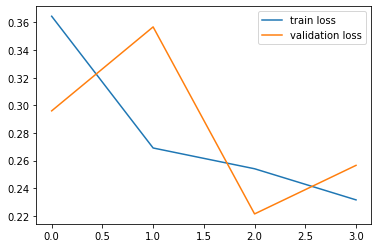

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss 
plt.plot(m.history['loss'], label='train loss')
plt.plot(m.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

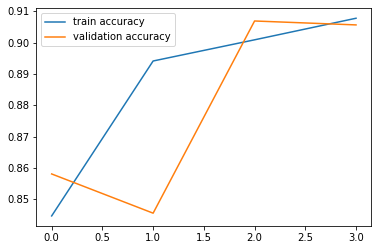

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(m.history['accuracy'], label='train accuracy')
plt.plot(m.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Malariya/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1600 images belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(
  test_set,
  steps=len(test_set),
)

50/50 [==============================] - 7s 139ms/step - loss: 0.4253 - accuracy: 0.8531


In [ ]:
print("accuracy on test dataset",test_accuracy)
print("----")
print("loss on test set",test_loss)

accuracy on test dataset 0.8531249761581421
----
loss on test set 0.42526236176490784


In [ ]:
model.save('finalmalariyamodel.h5')